Середньоквадратична помилка (MSE) на тестовому наборі: 101.38709255887335
Коефіцієнт детермінації (R^2) на тестовому наборі: 0.9994613448454422


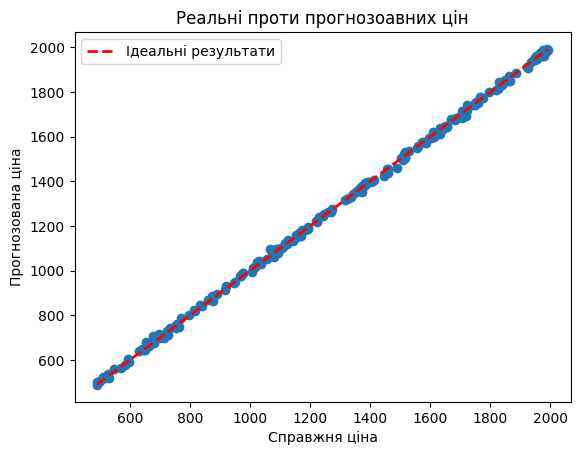

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Задайте розмірність даних
num_samples = 1000

# Генеруємо дані для ознак
living_area = np.random.uniform(50, 200, num_samples)
num_bedrooms = np.random.randint(1, 6, num_samples)
distance_to_center = np.random.uniform(1, 20, num_samples)

# Генеруємо цільову змінну - ціну житла
price = 10 * living_area + 5 * num_bedrooms - 2 * distance_to_center + np.random.normal(0, 10, num_samples)

# Розділіть дані на навчальний та тестовий набори (80% - 20%)
X = np.column_stack((living_area, num_bedrooms, distance_to_center))  # Ознаки
y = price  # Цільова змінна
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створіть об'єкт моделі лінійної регресії
model = LinearRegression()

# Навчіть модель на навчальних даних
model.fit(X_train, y_train)

# Зробіть прогнози на тестовому наборі
y_test_pred = model.predict(X_test)

# Оцініть якість моделі за допомогою метрик
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Виведемо результати
print("Середньоквадратична помилка (MSE) на тестовому наборі:", mse_test)
print("Коефіцієнт детермінації (R^2) на тестовому наборі:", r2_test)

# Побудуйте графік
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ідеальні результати')
plt.xlabel("Справжня ціна")
plt.ylabel("Прогнозована ціна")
plt.title("Реальні проти прогнозоавних цін")
plt.legend()
plt.show()
